# Project 1

### Student:

### Student Number

In [2]:
1212411

1212411

### Project Overview

#### Emotion Dataset

This Emotion Classification dataset is meant to help with research and experiments in natural language processing and emotion analysis. It includes a variety of text samples, each labeled with the emotion it expresses, such as happiness, excitement, anger, sadness, and more.


#### Objective
In this project, we aimed to compare three different word embedding methods—TF-IDF, GloVe, and spaCy embeddings—to determine their effectiveness in classifying emotions from text data. The dataset used for this analysis contains text samples labeled with three emotions: anger, fear, and joy.

Source: https://www.kaggle.com/datasets/abdallahwagih/emotion-dataset   


In [3]:
!pip install spacy
!python -m spacy download en_core_web_lg
! pip install contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.3 MB/s eta 0:00:00


In [4]:
import spacy
nlp = spacy.load('en_core_web_lg')

## 1. Data Preprocessing with SpaCy

In [5]:
# Importing necessary libraries

import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC



In [7]:
# Check the first few lines of the file
file_path = "/content/Emotion_classify_Data.csv"

with open(file_path, 'r') as file:
    for _ in range(5):  # Adjust the number of lines to read as needed
        print(file.readline())

Comment,Emotion

i seriously hate one subject to death but now i feel reluctant to drop it,fear

im so full of life i feel appalled,anger

i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it,fear

ive been really angry with r and i feel like an idiot for trusting him in the first place,joy



In [8]:
# Load dataset

df = pd.read_csv(file_path, encoding='utf-8')

In [9]:
# test dataset loading.

df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [10]:
# Basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [11]:
# Summary statistics
df.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [12]:
# Check for missing values
df.isnull().sum()

,0
Comment,0
Emotion,0


The dataset was loaded and basic exploratory data analysis was conducted, including visualizing the distribution of emotions and generating a word cloud.

<ipython-input-13-468bbbfbf7e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='viridis')


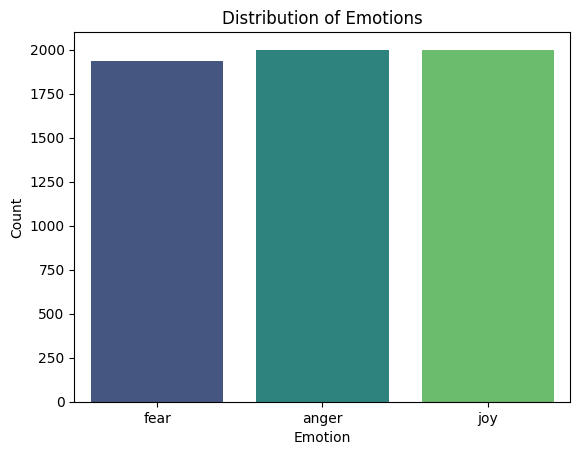

In [13]:
# Count plot of a "emotion" feature

sns.countplot(x='Emotion', data=df, palette='viridis')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

 Considering there is 5937 records, the dataset is well-distributed among the three emotions, fear, anger, and joy.

In [14]:
# Double-check the count of each emotion
emotion_counts = df['Emotion'].value_counts()
print(emotion_counts)

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64


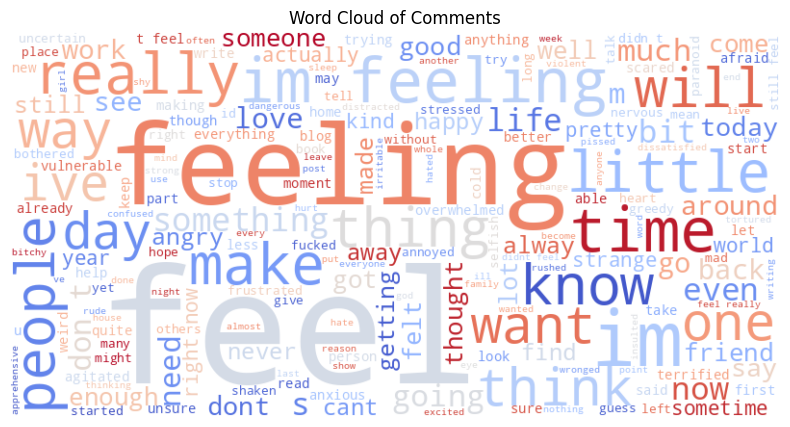

In [15]:
# References to plot the Word Cloud: https://www.datacamp.com/tutorial/wordcloud-python

# Assume the comments are in the first column
comments_column = df.columns[0]

# Combine all text data into one string
text = ' '.join(df[comments_column])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

### Word Cloud of comments words.

Above there is a visual representation of text data where the size of each word indicates its frequency or importance within the dataset.
In the context of this project, a word cloud helps to visualize the most common words in the comments, providing insights into the overall themes, topics, and sentiments expressed by users.



### 1.1. Cleaning the Text Document

Text data was cleaned by removing stop words, punctuation, and lemmatizing the words using spaCy.

In [16]:
# Function for text preprocessing
# Code provided from Project # 1
# Additional References: https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/

def text_cleaning(text):

    text = contractions.fix(text) # Add Expand contractions function to improve the accuracy of lemmatization.

    # Convert text to lowercase for consistency
    text = text.lower()

    # Process text with SpaCy
    doc = nlp(text)

    # Tokenize, remove stop words and punctuation, and lemmatize
    cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token.lemma_) > 1]

    return ' '.join(cleaned_tokens) # Join the cleaned tokens back into a single string

# Apply the cleaning function to the comments column
df['cleaned_text_spacy'] = df[comments_column].apply(text_cleaning)

# Display the first few rows to verify the cleaning
print(df[['cleaned_text_spacy']].head())

                                  cleaned_text_spacy
0   seriously hate subject death feel reluctant drop
1                                 life feel appalled
2  sit write start dig feeling think afraid accep...
3                  angry feel like idiot trust place
4        feel suspicious outside like rapture happen


In [17]:
# test dataset loading.

df.head()

,Comment,Emotion,cleaned_text_spacy
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,angry feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen


In [18]:
# Function to tokenize the cleaned text
def tokenize_text(text):
    return text.split()

# Apply the tokenization function to the cleaned text column
df['tokenized_text'] = df['cleaned_text_spacy'].apply(tokenize_text)


In [19]:
# Verify the tokenization

print(df[['cleaned_text_spacy', 'tokenized_text']].head())

                                  cleaned_text_spacy  \
0   seriously hate subject death feel reluctant drop   
1                                 life feel appalled   
2  sit write start dig feeling think afraid accep...   
3                  angry feel like idiot trust place   
4        feel suspicious outside like rapture happen   

                                      tokenized_text  
0  [seriously, hate, subject, death, feel, reluct...  
1                             [life, feel, appalled]  
2  [sit, write, start, dig, feeling, think, afrai...  
3           [angry, feel, like, idiot, trust, place]  
4  [feel, suspicious, outside, like, rapture, hap...  


In [20]:
# Word Embedding using Spacy

def spacy_vector(text):
    doc = nlp(text)
    return doc.vector

In [21]:
X_spacy = df['cleaned_text_spacy'].apply(spacy_vector).tolist()
X_spacy = np.array(X_spacy)

# Verify the shapes of the transformed data
print("Shape :", X_spacy.shape)


Shape : (5937, 300)


## 2. Model Selection

### Classification Models

#### 1. Regression with SpaCy Embeddings:

Hyperparameters:

Regularization Strength: 0.1 and 1.0.
Penalty:  l1 and l2

#### 2. Support Vector Machine (SVM)

Hyperparameters:

Regularization Parameter: 0.1 and 1.0.
Kernel:  linear and rbf.

## 3. Model Training and Hyperparameter Tuning

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report Logistic Regression Model:
              precision    recall  f1-score   support

       anger       0.74      0.71      0.73       409
        fear       0.73      0.73      0.73       396
         joy       0.75      0.78      0.77       383

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



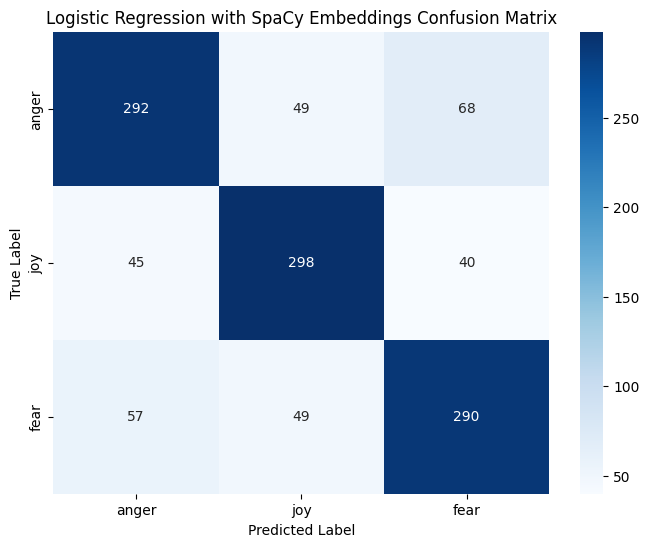

In [22]:
# Regression with SpaCy Embeddings:
# References: https://stackoverflow.com/questions/21816346/fine-tuning-parameters-in-logistic-regression
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

# Function to get SpaCy document vectors

def get_spacy_vector(text):
    doc = nlp(text)
    return doc.vector

# Apply SpaCy vectorization to the cleaned text
X_spacy = df['cleaned_text_spacy'].apply(get_spacy_vector).tolist()
X_spacy = np.array(X_spacy)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_spacy, df['Emotion'], test_size=0.2, random_state=123)

# Define the hyperparameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 1.0],          # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear']   # Solvers that support L1 and L2
}

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Initialize grid search with cross-validation for Logistic Regression
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit grid search
grid_search_log_reg.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)

# Evaluate the best model on the test set
best_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_log_reg_best = best_log_reg_model.predict(X_test)

# Classification report for Logistic Regression
print("Classification Report Logistic Regression Model:")
print(classification_report(y_test, y_pred_log_reg_best))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=['anger', 'joy', 'fear'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'joy', 'fear'], yticklabels=['anger', 'joy', 'fear'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix for the best Logistic Regression model
plot_confusion_matrix(y_test, y_pred_log_reg_best, 'Logistic Regression with SpaCy Embeddings Confusion Matrix')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Hyperparameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Classification Report for SVM Model:
              precision    recall  f1-score   support

       anger       0.73      0.73      0.73       409
        fear       0.74      0.72      0.73       396
         joy       0.75      0.77      0.76       383

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



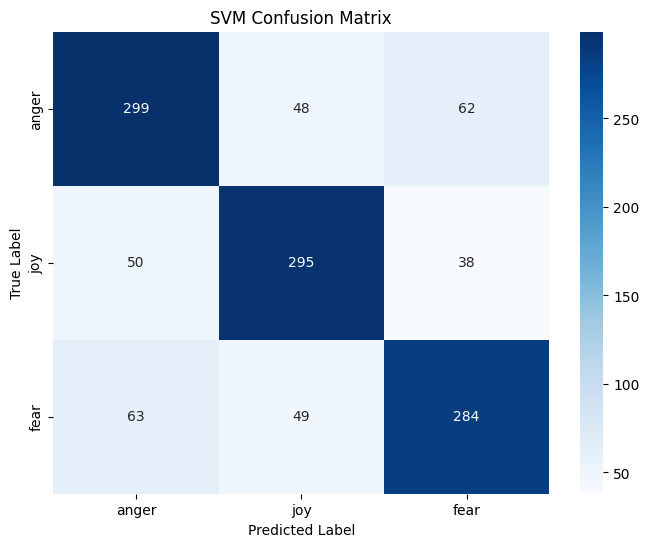

In [23]:
# Support Vector Machine
# References: https://www.youtube.com/watch?v=203zKEecHgg
# https://philipppro.github.io/Hyperparameters_svm_/

# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1.0],          # Regularization parameter
    'kernel': ['linear', 'rbf'] # Kernel type
}

# Initialize SVM model
svm_model = SVC()

# Initialize grid search with cross-validation for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit grid search
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Hyperparameters for SVM:", grid_search_svm.best_params_)

# Evaluate the best SVM model on the test set
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm_best = best_svm_model.predict(X_test)

# Classification report for SVM
print("Classification Report for SVM Model:")
print(classification_report(y_test, y_pred_svm_best))

# Plot confusion matrix for the best SVM model
plot_confusion_matrix(y_test, y_pred_svm_best, 'SVM Confusion Matrix')


### 4. Performance Evaluation

Performance Metrics for Logistic Regression with SpaCy Embeddings:
Accuracy: 0.7407
Precision: 0.7408
Recall: 0.7414
F1-score: 0.7409



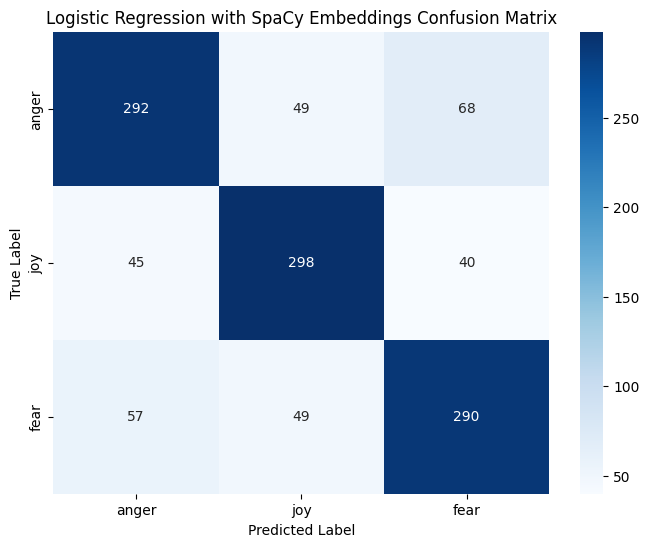

Performance Metrics for SVM:
Accuracy: 0.7391
Precision: 0.7393
Recall: 0.7395
F1-score: 0.7393



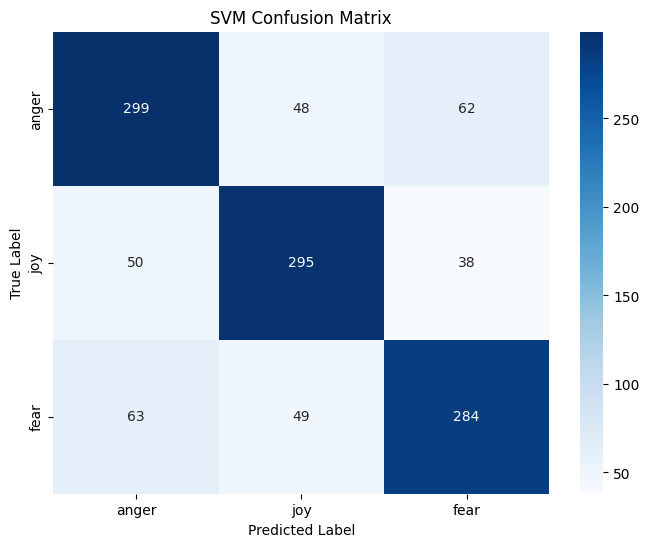

In [24]:
# Evaluate models

def evaluate_model(y_true, y_pred, model_name):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Print evaluation metrics
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, f'{model_name} Confusion Matrix')

# Evaluate the Logistic Regression model
evaluate_model(y_test, y_pred_log_reg_best, 'Logistic Regression with SpaCy Embeddings')

# Evaluate the SVM model
evaluate_model(y_test, y_pred_svm_best, 'SVM')

As we can see, the performance of both models are very similar.

#### Trying Different Parameters

1. Regression with SpaCy Embeddings:

Hyperparameters:

Regularization Strength: 0.1, 0.5, 1.0 (applied 0.1 and 1.0 before).

Penalty no changes.

Solver added: saga.

Maximum number of iterations added: 100.





2. Support Vector Machine (SVM)

Hyperparameters:

Regularization Parameter:0.1, 0.5, 1.0 (applied 0.1 and 1.0 before).

Kernel: added poly, (applied linear and rbf before).

gama: auto.

degree: 2,3

coef: 0.5, 1.0 (for poly).



In [28]:
# Define the hyperparameter grid
param_grid_log_reg = {
    'C': [0.1, 0,5, 1.0],  # Regularization strength
    'penalty': ['l1', 'l2'],      # Type of regularization
    'solver': ['saga'], # Solvers (saga supports both l1 and l2 penalties)
    'max_iter': [100]   # Maximum number of iterations
}

# Initialize logistic regression model
log_reg = LogisticRegression()

# Initialize grid search with cross-validation
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_log_reg.fit(X_train, y_train)

# Get the best hyperparameters
best_log_reg_params = grid_search_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_log_reg_params)

# Evaluate on the test set
y_pred_log_reg_best = grid_search_log_reg.best_estimator_.predict(X_test)
print("Classification Report Logistic Regression Model:")
print(classification_report(y_test, y_pred_log_reg_best))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Hyperparameters for Logistic Regression: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Classification Report Logistic Regression Model:
              precision    recall  f1-score   support

       anger       0.74      0.72      0.73       409
        fear       0.73      0.73      0.73       396
         joy       0.76      0.78      0.77       383

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 0.5, 1.0],   # Regularization parameter
    'kernel': ['poly'],  # Kernel type
    'gamma': ['auto'],    # Kernel coefficient for 'rbf', 'poly'
    'degree': [2, 3],           # Degree of the polynomial kernel function (only for 'poly')
    'coef0': [0.5, 1.0]       # Independent term in kernel function (for 'poly')
}

# Initialize the SVM model
svm_model = SVC()

# Initialize grid search with cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_params = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_svm_params)

# Evaluate on the test set
y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test)
print("Classification Report SVM Model:")
print(classification_report(y_test, y_pred_svm_best))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for SVM: {'C': 1.0, 'coef0': 0.5, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Classification Report SVM Model:
              precision    recall  f1-score   support

       anger       0.75      0.75      0.75       409
        fear       0.76      0.74      0.75       396
         joy       0.78      0.80      0.79       383

    accuracy                           0.76      1188
   macro avg       0.76      0.76      0.76      1188
weighted avg       0.76      0.76      0.76      1188



Performance Metrics for Logistic Regression with SpaCy Embeddings:
Accuracy: 0.7433
Precision: 0.7433
Recall: 0.7439
F1-score: 0.7435



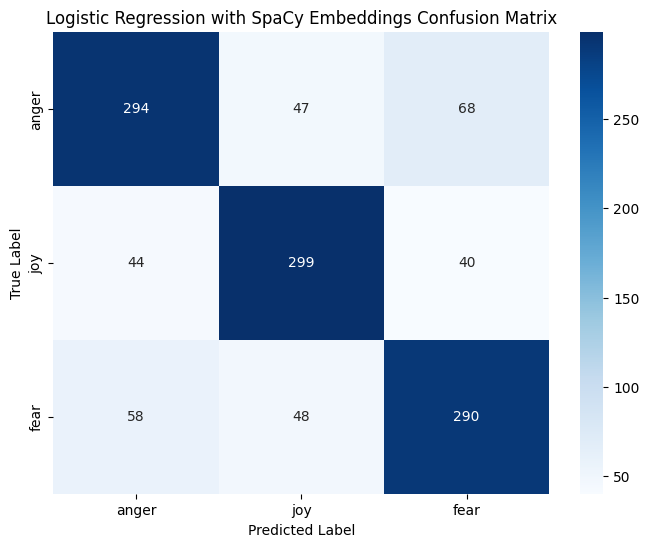

Performance Metrics for SVM:
Accuracy: 0.7626
Precision: 0.7628
Recall: 0.7632
F1-score: 0.7629



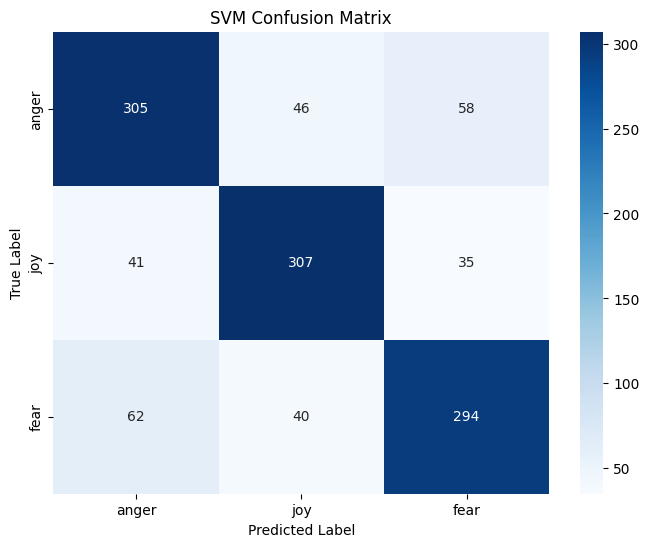

In [33]:
# Evaluate models

def evaluate_model(y_true, y_pred, model_name):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Print evaluation metrics
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, f'{model_name} Confusion Matrix')

# Evaluate the Logistic Regression model
evaluate_model(y_test, y_pred_log_reg_best, 'Logistic Regression with SpaCy Embeddings')

# Evaluate the SVM model
evaluate_model(y_test, y_pred_svm_best, 'SVM')

The slight adjustments in hyperparameters, particularly the addition of the saga solver and more varied regularization strengths, have slightly improved the performance of Logistic Regression.

The SVM model has seen a significant performance boost with the new hyperparameters, particularly the introduction of the poly kernel with gamma, degree, and coef0 adjustments.

## 5. Analysis and Conclusion

The dataset is relatively simple, with only three emotion categories. This makes it easier for models to learn and classify, which is reflected in the decent performance of both Logistic Regression and SVM models.

The simplicity of having only three labels might limit the depth of the model’s understanding and its ability to generalize to more complex emotional nuances, but this characteristic allows the models to achieve reasonable accuracy without needing overly complex architectures or extensive preprocessing.

The SVM model outperformed Logistic Regression across all performance metrics, indicating its superior ability to capture the underlying patterns in the data, especially after tuning the hyperparameters.

SpaCy embeddings helped both models achieve reasonable results. They were especially helpful for Logistic Regression, which is simpler and benefits from well-prepared data.

